# 가위바위보 판별기


##### DataSet 저장할 디렉토리 만들기 
##### TrainData: aiffel/lms_project_dataset/EP1 폴더
##### TestData:  aiffel/lms_project_dataset/EP1/test 폴더

In [1]:
# 이미지사이즈 변환 (224*224) -> (112*112)===

from PIL import Image
import os, glob
print("PIL 라이브러리 import 완료!")
import os
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
	print(len(images), " images to be resized.")
    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(224,224)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")    
	print(len(images), " images resized.")
# 가위/바위/보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/lms_project_dataset/EP1/scissor"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/lms_project_dataset/EP1/rock"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/lms_project_dataset/EP1/paper"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/lms_project_dataset/EP1/test/rock"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/lms_project_dataset/EP1/test/paper"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/lms_project_dataset/EP1/test/scissor"
resize_images(image_dir_path)

PIL 라이브러리 import 완료!
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [2]:
# load_data()함수 작성 

import numpy as np
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=224
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1 
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [3]:
# Train데이터 불러오기 
image_dir_path = os.getenv("HOME") + "/aiffel/lms_project_dataset/EP1"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_train shape: {}".format(x_train_norm.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 224, 224, 3)
y_train shape: (300,)


라벨:  1


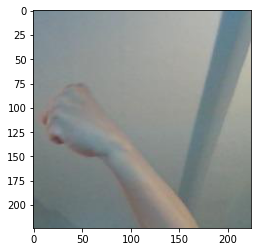

In [4]:
# train이미지 불러와서 확인 (낮은 해상도의 사진)
import matplotlib.pyplot as plt
plt.imshow(x_train[111])
print('라벨: ', y_train[111]) #1은 바위

In [5]:
# 딥러닝 네트워크
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(8, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 8)         2312      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        2

In [6]:
### 딥러닝 네트워크 학습시키기
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_norm, y_train, epochs=10)
train_loss, train_accuracy = model.evaluate(x_train_norm, y_train, verbose=2)
print("test_loss: {} ".format(train_loss))
print("test_accuracy: {}".format(train_accuracy))

Epoch 1/10
10/10 [==============================] - 12s 590ms/step - loss: 1.1112 - accuracy: 0.3250
Epoch 2/10
10/10 [==============================] - 1s 80ms/step - loss: 1.0985 - accuracy: 0.3490
Epoch 3/10
10/10 [==============================] - 1s 79ms/step - loss: 1.0936 - accuracy: 0.3258
Epoch 4/10
10/10 [==============================] - 1s 79ms/step - loss: 1.0847 - accuracy: 0.3814
Epoch 5/10
10/10 [==============================] - 1s 81ms/step - loss: 1.0849 - accuracy: 0.3984
Epoch 6/10
10/10 [==============================] - 1s 80ms/step - loss: 1.0280 - accuracy: 0.4482
Epoch 7/10
10/10 [==============================] - 1s 80ms/step - loss: 0.8547 - accuracy: 0.7772
Epoch 8/10
10/10 [==============================] - 1s 80ms/step - loss: 0.5686 - accuracy: 0.7902
Epoch 9/10
10/10 [==============================] - 1s 80ms/step - loss: 0.3577 - accuracy: 0.8654
Epoch 10/10
10/10 [==============================] - 1s 80ms/step - loss: 0.2395 - accuracy: 0.9354
10/10 -

In [7]:
# x_test, y_test set만들기
image_dir_path = os.getenv("HOME") + "/aiffel/lms_project_dataset/EP1/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 224, 224, 3)
y_test shape: (300,)


In [8]:
# 모델 평가하기 
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 5.3940 - accuracy: 0.4367
test_loss: 5.393998622894287 
test_accuracy: 0.43666666746139526


In [9]:
# 모델평가하기2
# evaluation한 값을 못믿겠다 다 찍어보겠다. 
idxnum=[]
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
#print(predicted_result.shape) # (10000, 10)
predicted_labels = np.argmax(predicted_result, axis=1) # predicted_labels의 max는 9임. 
for idx in range(300):
    if predicted_labels[idx] != y_test[idx]: 
        idxnum.append(idx)

print("잘못된 횟수=", len(idxnum), "잘못된확률=", round(len(idxnum)/300,4))
print("잘못된 사진 번호 리스트=" , idxnum)

잘못된 횟수= 169 잘못된확률= 0.5633
잘못된 사진 번호 리스트= [1, 4, 5, 6, 8, 12, 20, 22, 23, 25, 28, 29, 30, 32, 33, 34, 36, 42, 44, 45, 46, 51, 53, 54, 55, 58, 60, 61, 63, 67, 68, 69, 71, 72, 75, 76, 77, 78, 80, 83, 84, 86, 87, 88, 89, 90, 91, 93, 94, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 202, 210, 211, 212, 236, 242, 258, 260, 261, 267, 271, 274, 276, 280, 284, 288, 294]
